In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris 

In [4]:
iris = load_iris()

In [5]:
df = pd.DataFrame(iris.data, columns=[iris.feature_names])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
X = iris.data 
X.shape

(150, 4)

In [7]:
from sklearn.preprocessing import StandardScaler 
X_std = StandardScaler().fit_transform(X)
print(X_std[0:5])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [8]:
X_cov_matrix = np.cov(X_std.T)

In [9]:
X_cov_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [10]:
eig_vals, eig_vecs = np.linalg.eig(X_cov_matrix)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues 
[2.93808505 0.9201649  0.14774182 0.02085386]


In [11]:
eig_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key=lambda x: x[0],reverse=True)

In [12]:
for i in eig_pairs:
    print(i[0])

2.9380850501999927
0.9201649041624892
0.1477418210449476
0.020853862176462064


In [15]:
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance captured by each component is \n",var_exp)
print(40 * '-')
print ("Cumulative variance captured as we travel each component \n",cum_var_exp)

Variance captured by each component is 
 [72.96244541329983, 22.850761786701817, 3.668921889282866, 0.5178709107154746]
----------------------------------------
Cumulative variance captured as we travel each component 
 [ 72.96244541  95.8132072   99.48212909 100.        ]


In [16]:
eig_pairs

[(2.9380850501999927,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9201649041624892,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.1477418210449476,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020853862176462064,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [17]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
eig_pairs[1][1].reshape(4,1)))
matrix_w

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [19]:
Y = X_std.dot(matrix_w)
Y[:5]

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538]])

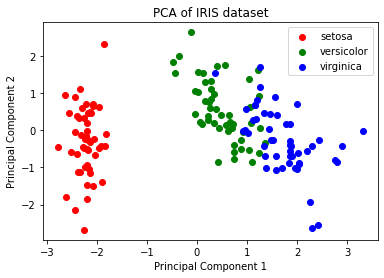

In [20]:
plt.figure()
target_names = iris.target_names
y = iris.target
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(Y[y==i,0], Y[y==i,1], c=c, label=target_name)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()